# Data Plot - Almemo

Goal:
- single plots
 - plot  single files
 - calc cDA
 - plot cDAs multiple files
- multiple plots
 - combine files
 - plot


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
# https://docs.python.org/3/library/glob.html

#### 1. Import File

In [103]:
file0 = pd.read_csv("H:\Python_Code\Plot_\Log_20190705.txt",delimiter=';', skiprows=[0], names=[
    'Timestamp', 'Epoch', 'OutsideVert', 'OutsideHor', 'InsideCeiling', 'InsideTable', 'InsideWork', 'InsideEye', 'new','InsideTable2','InsideWork2'])
file0.head()

,Timestamp,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
0,05.07.2019 00:00:36,1562277636422,10.0,0.0,0.06,0.0,0.0,38.0,3.0,0.0,0.0
1,05.07.2019 00:01:46,1562277706419,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
2,05.07.2019 00:02:56,1562277776418,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
3,05.07.2019 00:04:06,1562277846415,10.0,0.0,0.03,0.0,0.0,39.0,3.0,0.0,0.0
4,05.07.2019 00:05:16,1562277916416,10.0,0.0,0.06,0.0,0.0,32.0,3.0,0.0,0.0


#### 2. Change File as needed
- Split Timestamp into Date + Time 
- remove old Timestamp and some other columns

In [104]:
new = file0.Timestamp.str.split(pat=" ", n=1, expand=True)
display(new.head(3))
file0["Date"] = new[0]
file0["Time"] = new[1]
file0.drop(columns=["Epoch", "Timestamp" , "new"], inplace=True)
display(file0.tail())

,0,1
0,05.07.2019,00:00:36
1,05.07.2019,00:01:46
2,05.07.2019,00:02:56


,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,Date,Time
626,28970.0,69510.0,100.52,277.6,136.1,149.0,277.57,136.06,05.07.2019,11:13:15
627,26170.0,61510.0,92.72,259.0,126.7,146.0,259.04,126.70,05.07.2019,11:14:25
628,25250.0,59310.0,87.50,243.0,120.3,139.0,243.01,120.27,05.07.2019,11:15:25
629,24550.0,56950.0,86.47,240.1,116.6,140.0,240.14,116.55,05.07.2019,11:16:25
630,24530.0,55940.0,90.37,252.2,120.9,138.0,252.21,120.89,05.07.2019,11:17:25


In [105]:
df0 = file0[['Time','InsideWork']]
df0.head(3)
# type(df0)

,Time,InsideWork
0,00:00:36,0.0
1,00:01:46,0.0
2,00:02:56,0.0


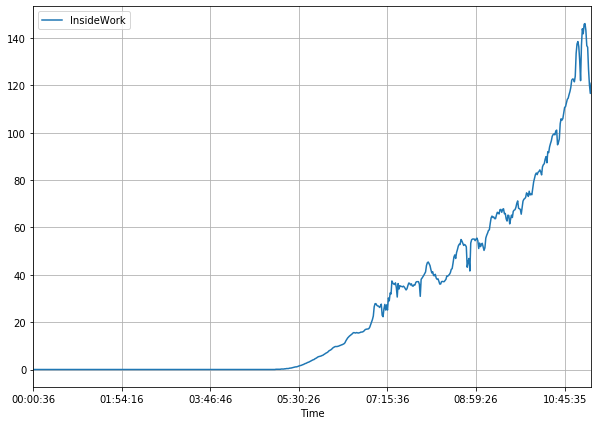

In [106]:
ax = file0.plot(x='Time',y='InsideWork',grid=True,figsize=(10,7))
#ax.set_xticks(df0.Time)

#### 3. Better import with recognizing Timestaps
http://sergilehkyi.com/tips-on-working-with-datetime-index-in-pandas/

In [107]:
file1 = pd.read_csv("H:\Python_Code\Plot_\Log_20190705.txt",delimiter=';', skiprows=[0], names=[
    'Timestamp', 'Epoch', 'OutsideVert', 'OutsideHor', 'InsideCeiling', 'InsideTable', 'InsideWork', 
    'InsideEye', 'new','InsideTable2', 'InsideWork2'],
                    index_col='Timestamp', parse_dates=True)
file1.head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-07 00:00:36,1562277636422,10.0,0.0,0.06,0.0,0.0,38.0,3.0,0.0,0.0
2019-05-07 00:01:46,1562277706419,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
2019-05-07 00:02:56,1562277776418,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
2019-05-07 00:04:06,1562277846415,10.0,0.0,0.03,0.0,0.0,39.0,3.0,0.0,0.0
2019-05-07 00:05:16,1562277916416,10.0,0.0,0.06,0.0,0.0,32.0,3.0,0.0,0.0


In [108]:
file1.loc['2019-05-07 00:00' : '2019-05-07 00:05']

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-07 00:00:36,1562277636422,10.0,0.0,0.06,0.0,0.0,38.0,3.0,0.0,0.0
2019-05-07 00:01:46,1562277706419,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
2019-05-07 00:02:56,1562277776418,10.0,0.0,0.06,0.0,0.0,29.0,3.0,0.0,0.0
2019-05-07 00:04:06,1562277846415,10.0,0.0,0.03,0.0,0.0,39.0,3.0,0.0,0.0
2019-05-07 00:05:16,1562277916416,10.0,0.0,0.06,0.0,0.0,32.0,3.0,0.0,0.0


#### 4. Even Better ... import all Files in one DF and save new csv


In [109]:
#path = "H:\Python_Code\Plot_"


pattern = 'H:/Python_Code/Plot_/*.txt'
txt_files = glob.glob(pattern)


frames = []

for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable"', 
                                                             'InsideWork"'],index_col='Timestamp', parse_dates=True)
    frames.append(df)

df = pd.concat(frames)

df.to_csv("test.csv", sep=';', encoding='utf-8')

display(df.head(2))
display(df.tail(2))

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,"InsideTable""","InsideWork"""
Timestamp,,,,,,,,,,
2019-04-28 00:00:46,1556402446397,10,0,1,9,1,1,3,NaN,NaN
2019-04-28 00:01:56,1556402516397,10,0,1,9,2,1,3,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,"InsideTable""","InsideWork"""
Timestamp,,,,,,,,,,
2019-05-07 11:16:25,1562318185642,24550,56950,86.47,240.1,116.6,140,134,240.14,116.55
2019-05-07 11:17:25,1562318245643,24530,55940,90.37,252.2,120.9,138,136,252.21,120.89


In [110]:
df.loc["2019-04-07 19:00" : '2019-04-07 19:13'].head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,"InsideTable""","InsideWork"""
Timestamp,,,,,,,,,,
2019-04-07 19:00:16,1562259616856,7430.00,23630.00,29.94,88.90,39.70,74.00,25.00,88.86,39.71
2019-04-07 19:01:26,1562259686853,7290.00,23310.00,29.39,87.10,39.10,71.00,29.00,87.05,39.10
2019-04-07 19:02:36,1562259756850,7280.00,23120.00,29.18,87.00,39.00,70.00,27.00,86.88,38.99
2019-04-07 19:03:46,1562259826851,7230.00,22850.00,29.08,86.50,38.80,76.00,28.00,86.50,38.82
2019-04-07 19:04:56,1562259896849,7190.00,22530.00,28.81,86.00,38.60,69.00,27.00,86.03,38.62


In [136]:
# ax1 = df.loc['2019-04'].plot(x='Time',y='InsideWork',grid=True,figsize=(10,7))
# df.loc['2019-04'].plot(x='Timestamp',y='InsideWork',grid=True,figsize=(10,7))
df2 = df[df.OutsideHor == 2000]['OutsideHor']
df2.head()
# plt.plot(df2)

Timestamp
2019-05-05 07:39:15    2000
2019-05-05 07:42:25    2000
2019-05-17 20:22:36    2000
2019-05-20 07:52:22    2000
2019-05-20 19:19:21    2000
Name: OutsideHor, dtype: object

In [144]:
file_today = pd.read_csv("H:\Python_Code\Plot_\Log_20190701.txt", delimiter=';', skiprows=[0],
            names=['Timestamp', 'Epoch', 'OutsideVert', 'OutsideHor', 'InsideCeiling', 
                   'InsideTable', 'InsideWork', 'InsideEye', 'new', 'InsideTable2', 'InsideWork2'])
file_today.head(3)


,Timestamp,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
0,01.07.2019 00:00:08,1561932008388,10,0,9,15,3,2,4,NaN,NaN
1,01.07.2019 00:01:08,1561932068396,10,0,3,11,3,4,4,NaN,NaN
2,01.07.2019 00:02:08,1561932128403,10,0,7,18,3,5,4,NaN,NaN


In [145]:
spl = file_today.Timestamp.str.split(pat=" ", n=1, expand=True)
display(spl.head(3))
file_today["Date"] = new[0]
file_today["Time"] = new[1]
file_today.drop(columns=["Epoch", "Timestamp" , "new"], inplace=True)

display(file_today.head())

# Add column with ratio
# file_today['ratio'] = file_today['InsideCeiling']/file_today['OutsideVert']*100


,0,1
0,01.07.2019,00:00:08
1,01.07.2019,00:01:08
2,01.07.2019,00:02:08


,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,Date,Time
0,10,0,9,15,3,2,NaN,NaN,05.07.2019,00:00:36
1,10,0,3,11,3,4,NaN,NaN,05.07.2019,00:01:46
2,10,0,7,18,3,5,NaN,NaN,05.07.2019,00:02:56
3,10,0,8,17,3,3,NaN,NaN,05.07.2019,00:04:06
4,10,0,9,15,3,2,NaN,NaN,05.07.2019,00:05:16


TypeError: nan is not a string

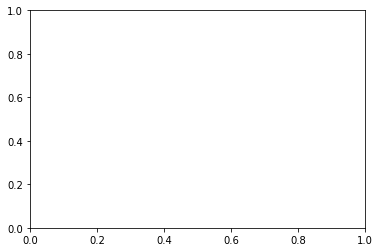

In [146]:
x = file_today['Time']
y1 = file_today['OutsideVert']
y2 = file_today['InsideCeiling']

plt.plot(x,y1,y2)

0    0.9
1    0.3
2    0.7
3    0.8
4    0.9
dtype: float64

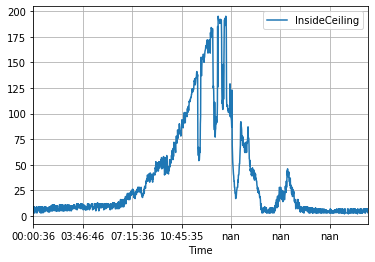

In [147]:
#ax2 = file_today.plot(x,y1)
ax2 = file_today.plot(x='Time',y='InsideCeiling',grid=True)
y = y2/y1
display(y.head())
#ax3 = plt.plot(x,y)

In [148]:
ax3 = file_today.plot(x='Time', y = 'ratio', grid = True, xlabel='Zeit')

#ax3.ylabel('%')

KeyError: 'ratio'

In [ ]:
file4 = pd.read_csv("H:\Python_Code\Plot_\Log_20190705.txt",delimiter=';')
file4.head()
